# Import Module

In [79]:
from email import header
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load Dataset

In [60]:
#load dataset
df = pd.read_csv('MAP_dataset.csv')
df_x, df_y = df.iloc[:,0:-1], df.iloc[:,-1]
x, y = df_x.values, df_y.values
columns_name = df_x.columns.values.tolist()

# Pearson Correlation Coefficient

## Pearson correlation coefficient and p-value for testing non-correlation.
The Pearson correlation coefficient measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship.
## Parameters
x : (N,) array_like  
    Input array.  
y : (N,) array_like  
    Input array.   
## Returns
r : float  
    Pearson's correlation coefficient.  
p-value : float  
    Two-tailed p-value.

In [66]:
cor_list = []
p_list = []
for i in range(x.shape[1]):
    cor, p = pearsonr(x[:,i],y)
    cor_list.append(cor)
    p_list.append(p)
df = pd.DataFrame([cor_list,p_list],columns=columns_name,index=["correlation coefficient","p-value"])

In [62]:
df

,Heart_Rate,T0_MAP,BMI,Height,Age,T0_SBP,SBP,Weight,T0_HR,DBP,...,Operation,Sex_1,Allergy,Sex_2,Drinking,Smoking,Cancer,Anemia,Hepatitis,Hypertension
correlation coefficient,0.119491,-0.092450,0.099930,-0.152645,0.114512,0.062968,0.021732,-0.003311,0.103342,-0.136952,...,-0.174949,-0.041376,0.128911,0.041376,-0.087723,-0.101642,-0.079332,-0.087547,-0.028980,-0.125450
p-value,0.134805,0.247956,0.211573,0.055528,0.151950,0.431873,0.786371,0.967061,0.196310,0.086183,...,0.027906,0.605726,0.106470,0.605726,0.273068,0.203812,0.321768,0.274038,0.717758,0.116282


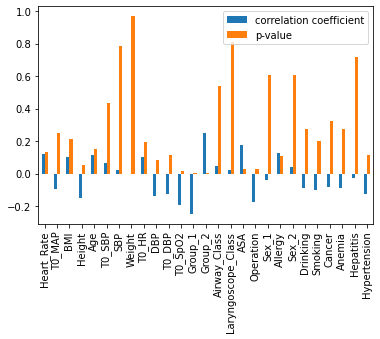

In [63]:
df.T.plot(kind='bar')
plt.show()

# Recursive Feature Elimination

# Feature ranking with recursive feature elimination.
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
# Parameters
estimator : Estimator instance  
    A supervised learning estimator with a fit method that provides information about feature importance (e.g. coef_, feature_importances_).  
n_features_to_select : int or float, default=None  
    The number of features to select. If None, half of the features are selected. If integer, the parameter is the absolute number of features to select. If float between 0 and 1, it is the fraction of features to select.  
step : int or float, default=1  
    If greater than or equal to 1, then step corresponds to the (integer) number of features to remove at each iteration. If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration.  
verbose : int, default=0  
    Controls verbosity of output.  
importance_getter : str or callable, default='auto'  
    If 'auto', uses the feature importance either through a coef_ or feature_importances_ attributes of estimator.

In [75]:
x_new = RFE(estimator=LogisticRegression(), n_features_to_select=10).fit_transform(x, y)
print(x_new.shape)

(158, 10)


# Embedded

## Meta-transformer for selecting features based on importance weights.
## Parameters
estimator : object  
    The base estimator from which the transformer is built. This can be both a fitted (if prefit is set to True) or a non-fitted estimator. The estimator should have a feature_importances_ or coef_ attribute after fitting. Otherwise, the importance_getter parameter should be used.  
threshold : str or float, default=None  
    The threshold value to use for feature selection. Features whose importance is greater or equal are kept while the others are discarded. If "median" (resp. "mean"), then the threshold value is the median (resp. the mean) of the feature importances. A scaling factor (e.g., "1.25*mean") may also be used. If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5. Otherwise, "mean" is used by default.  
prefit : bool, default=False  
    Whether a prefit model is expected to be passed into the constructor directly or not. If True, estimator must be a fitted estimator. If False, estimator is fitted and updated by calling fit and partial_fit, respectively.  
norm_order : non-zero int, inf, -inf, default=1  
    Order of the norm used to filter the vectors of coefficients below threshold in the case where the coef_ attribute of the estimator is of dimension 2.  
max_features : int, callable, default=None  
    The maximum number of features to select.  
If an integer, then it specifies the maximum number of features to allow.  
If a callable, then it specifies how to calculate the maximum number of features allowed by using the output of max_feaures(X).  
If None, then all features are kept.  
    To only select based on max_features, set threshold=-np.inf.  
importance_getter : str or callable, default='auto'  
    If 'auto', uses the feature importance either through a coef_ attribute or feature_importances_ attribute of estimator.

In [76]:
x_new = SelectFromModel(LogisticRegression(penalty="l1", C=1, solver='liblinear')).fit_transform(x, y)
print(x_new.shape)

(158, 16)


## Feature importance

Feature ranking based on learning models The idea of this approach is to build a predictive model for each individual feature and response variable directly using the machine learning algorithm you want to use. If the relationship between a feature and response variable is non-linear, you can use a tree-based approach (decision tree, random forest), or an extended linear model, etc. Tree-based methods are easier to use because they model the nonlinear relationship better and do not require much debugging. However, attention should be paid to the overfitting problem, so the depth of the tree should preferably not be too large, and then cross-validation should be applied. The features are scored by this training to obtain correlations before training the final model.

## Parameters
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
    The target variable to try to predict in the case of supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into train/test set. Only used in conjunction with a "Group" cv instance (e.g., GroupKFold).

scoring : str or callable, default=None
    A str (see model evaluation documentation) or a scorer callable object / function with signature scorer(estimator, X, y) which should return only a single value.

    Similar to cross_validate but only a single metric is permitted.

    If None, the estimator's default scorer (if available) is used.

cv : int, cross-validation generator or an iterable, default=None
    Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 5-fold cross validation,
int, to specify the number of folds in a (Stratified)KFold,
CV splitter,
An iterable that generates (train, test) splits as arrays of indices.
    For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with shuffle=False so the splits will be the same across calls.

    Refer User Guide <cross_validation> for the various cross-validation strategies that can be used here.

n_jobs : int, default=None
    Number of jobs to run in parallel. Training the estimator and computing the score are parallelized over the cross-validation splits. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary <n_jobs> for more details.

verbose : int, default=0
    The verbosity level.

fit_params : dict, default=None
    Parameters to pass to the fit method of the estimator.

pre_dispatch : int or str, default='2*n_jobs'
    Controls the number of jobs that get dispatched during parallel execution. Reducing this number can be useful to avoid an explosion of memory consumption when more jobs get dispatched than CPUs can process. This parameter can be:

- `None`, in which case all the jobs are immediately
created and spawned. Use this for lightweight and fast-running jobs, to avoid delays due to on-demand spawning of the jobs

- An int, giving the exact number of total jobs that are
spawned

- A str, giving an expression as a function of n\_jobs,
as in '2*n_jobs'

error_score : 'raise' or numeric, default=np.nan
    Value to assign to the score if an error occurs in estimator fitting. If set to 'raise', the error is raised. If a numeric value is given, FitFailedWarning is raised.

## Returns
scores : ndarray of float of shape=(len(list(cv)),)
    Array of scores of the estimator for each run of the cross validation.

In [91]:
rf = RandomForestClassifier(n_estimators=20, max_depth=4)
scores = []
for i in range(x.shape[1]):
    score = cross_val_score(rf, x[:,i:i+1], y, scoring='accuracy', cv=3)
    scores.append(np.mean(score))
df = pd.DataFrame([scores],columns=columns_name,index=['accuracy'])

In [92]:
df

,Heart_Rate,T0_MAP,BMI,Height,Age,T0_SBP,SBP,Weight,T0_HR,DBP,...,Operation,Sex_1,Allergy,Sex_2,Drinking,Smoking,Cancer,Anemia,Hepatitis,Hypertension
accuracy,0.765844,0.708999,0.759676,0.772254,0.753024,0.727746,0.759676,0.746613,0.746976,0.759434,...,0.772134,0.772134,0.765723,0.772134,0.772134,0.772134,0.772134,0.772134,0.772134,0.772134


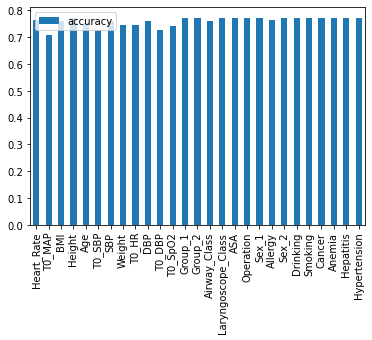

In [93]:
df.T.plot(kind='bar')
plt.show()